### Load required Libraries

In [88]:
#Import pandas to read the dataset
import pandas as pd
#Import numpy
import numpy as np
#Import sklearn for machine learning algorithm
import sklearn
#Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Import sklearn metrics module for R squared score
from sklearn.metrics import r2_score
#Import sklearn metrics module for accuracy calculation
from sklearn import metrics
#Import classification report module to calculate precision, f1 score, etc.
from sklearn.metrics import classification_report
#Import confusion matrix module to generate confusion matrix
from sklearn.metrics import confusion_matrix

#Import pyplot for data visualization
import matplotlib.pyplot as plt

#Disable chained_assignment warning that may distract reading
pd.options.mode.chained_assignment = None

### Step 1: Obtain Data

In [89]:
DigitalData = pd.read_excel("/Users/phuonglucydoan/Desktop/Portfolio/Star Digital Case/StarDigitalCase_RawData.xlsx")

In [90]:
DigitalData.sample(5)

,id,purchase,test,imp_1,imp_2,imp_3,imp_4,imp_5,imp_6
16306,651638,1,1,0,15,0,0,0,0
12942,268722,0,0,0,1,0,0,0,0
2458,603247,1,1,0,0,0,0,0,1
14537,721096,0,1,0,3,0,0,0,10
4002,290689,0,1,0,0,0,0,0,1


### Step 2: Data pre-processing

#### 2.1. Check column names

In [91]:
#Check column names for any typos
DigitalData.columns

Index(['id', 'purchase', 'test', 'imp_1', 'imp_2', 'imp_3', 'imp_4', 'imp_5',
       'imp_6'],
      dtype='object')

#### 2.2. Handle input errors in data type

In [92]:
#Data summary
DigitalData.describe()

,id,purchase,test,imp_1,imp_2,imp_3,imp_4,imp_5,imp_6
count,2.530300e+04,25303.000000,25303.000000,25303.000000,25303.000000,25303.000000,25303.000000,25303.000000,25303.000000
mean,7.089534e+05,0.502865,0.895032,0.930917,3.427775,0.094771,1.589495,0.048967,1.783464
std,4.084545e+05,0.500002,0.306518,5.629510,13.755455,1.505434,6.683091,0.570752,7.010298
min,2.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.538805e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.083440e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.062738e+06,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
max,1.413367e+06,1.000000,1.000000,296.000000,373.000000,148.000000,225.000000,51.000000,404.000000


In [111]:
DigitalData["purchase"] = DigitalData["purchase"].astype("category")

In [112]:
#Check data types
DigitalData.dtypes

id             int64
purchase    category
test           int64
imp_1          int64
imp_2          int64
imp_3          int64
imp_4          int64
imp_5          int64
imp_6          int64
dtype: object

In [94]:
#Check if there is any missing data
DigitalData.isnull().sum()

id          0
purchase    0
test        0
imp_1       0
imp_2       0
imp_3       0
imp_4       0
imp_5       0
imp_6       0
dtype: int64

### Step 3: Split the processed data into training and testing data

In [118]:
X = pd.DataFrame(DigitalData.iloc[:,3:9])
y = pd.DataFrame(DigitalData.iloc[:,1])

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=8810)

### Step 4: Learn from training datasets and make predictions

In [120]:
RF_class = RandomForestClassifier(n_estimators=50)
RF_class = RF_class.fit(X_train, y_train)
y_pred_RF = RF_class.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Step 5: Evaluate Random Forest model

In [121]:
#R-squared
Rsquared_RF = r2_score(y_test, y_pred_RF).round(decimals=3)
Rsquared_RF

-0.387

In [122]:
#Confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)

In [123]:
#Convert Confusion Matrix into dataframe for better readability
cm_RF_df = pd.DataFrame(cm_RF, columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                        index = ["Actual Class " + str(class_name) for class_name in [0,1]])

print("Confusion Matrix of Random Forest Classifier on sample 1:\n", cm_RF_df)

Confusion Matrix of Random Forest Classifier on sample 1:
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3412                358
Actual Class 1               2274               1547


In [124]:
#Calculate Specificity measure from Confusion matrix
Specificity_RF = cm_RF[1,1]/(cm_RF[1,0] + cm_RF[1,1])

print("Specificity score of RF is ", Specificity_RF)

Specificity score of RF is  0.4048678356451191


In [125]:
#Accuracy score
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("Accuracy score of RF is ", Accuracy_RF)

Accuracy score of RF is  0.6532736134896588


In [126]:
#Classification report
cr_RF = pd.DataFrame(metrics.classification_report(y_test, y_pred_RF, output_dict=True))

print("Classification Report of Random Forest Classifier:\n", cr_RF)

Classification Report of Random Forest Classifier:
                      0            1  accuracy    macro avg  weighted avg
precision     0.600070     0.812073  0.653274     0.706072      0.706784
recall        0.905040     0.404868  0.653274     0.654954      0.653274
f1-score      0.721658     0.540342  0.653274     0.631000      0.630391
support    3770.000000  3821.000000  0.653274  7591.000000   7591.000000


### Performance Measure Table

In [127]:
#Extract Precision, Recall and f-1 score from classification report of each algorithm
measure_RF = pd.DataFrame(cr_RF.iloc[:-1,3])

In [128]:
#Combine them into a table
measure_RF

,macro avg
precision,0.706072
recall,0.654954
f1-score,0.631000


### Visualization of Variable Importance for Random Forest Classifier

Text(0.5, 1.0, 'Variable Importance Plot for Random Forest Classifier')

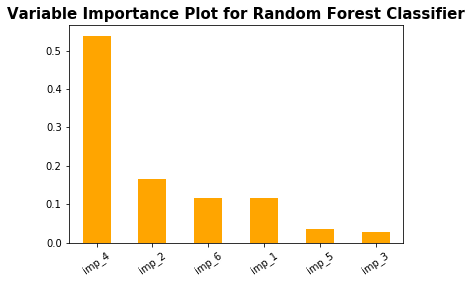

In [130]:
#Variable importances
RFclass_VarImportance = pd.Series(RF_class.feature_importances_, index = X.columns)

#Visualize with bar chart
RFclass_VarImportance.nlargest(6).plot(kind="bar", rot=35, color="orange")
plt.title("Variable Importance Plot for Random Forest Classifier", size=15, weight="bold")

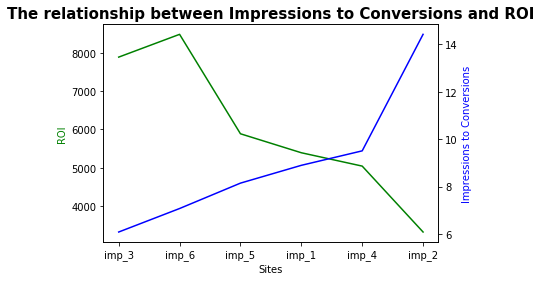

In [134]:
x = ["imp_3", "imp_6", "imp_5", "imp_1", "imp_4", "imp_2"]
y1 = [7886.57, 8480.07, 5888.62, 5394.01, 5045.97, 3328.28]
y2 = [6.09, 7.08, 8.15, 8.90, 9.51, 14.42]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Sites')
ax1.set_ylabel('ROI', color='g')
ax2.set_ylabel('Impressions to Conversions', color='b')
plt.title("The relationship between Impressions to Conversions and ROI"
          , size=15, weight="bold")

plt.show()